In [9]:
import kagglehub
vipoooool_new_plant_diseases_dataset_path = kagglehub.dataset_download('vipoooool/new-plant-diseases-dataset')

In [10]:
Root_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
valid_dir = Root_dir + "/valid"
test_dir = "/kaggle/input/new-plant-diseases-dataset/test"

In [11]:
import tensorflow as tf
import numpy as np
import os

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab-Notebooks/project/trained_plant_disease_model.keras')

validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)


Found 17572 files belonging to 38 classes.


In [12]:
class_names = validation_set.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [14]:
import cv2
import matplotlib.pyplot as plt
import glob

# 1) Gather all test file paths:
pattern = "/kaggle/input/new-plant-diseases-dataset/test/test/*.JPG"
file_paths = sorted(glob.glob(pattern))
print(file_paths)


for image_path in file_paths:
    # Load and display the image
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Preprocess for prediction
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    input_arr = tf.keras.preprocessing.image.img_to_array(img)
    input_arr = np.expand_dims(input_arr, axis=0)

    # Predict
    predictions = model.predict(input_arr)
    result_index = np.argmax(predictions)
    model_prediction = class_names[result_index]

    # Visualize with title
    plt.figure(figsize=(4, 4))
    plt.imshow(img_rgb)
    plt.title(f"{image_path.split('/')[-1]}: {model_prediction}")
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [15]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/test/test',
    labels=None,       # unlabeled
    label_mode=None,
    batch_size=32,
    image_size=(128, 128),
    shuffle=False      # preserve file order
)

Found 33 files.


In [16]:
predictions = model.predict(test_set)
print(predictions)
print(predictions.shape)
predicted_indices = np.argmax(predictions, axis=1)
print(predicted_indices)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
[[1.7313424e-08 6.1930599e-08 9.9929881e-01 ... 1.3428219e-08
  1.8902942e-04 1.2504261e-08]
 [8.7205629e-09 5.4662858e-12 9.9329811e-01 ... 6.1729399e-09
  4.3998761e-14 6.3147215e-10]
 [1.7825952e-09 2.2205086e-08 9.1826379e-01 ... 9.0937806e-07
  8.6150004e-11 7.3969669e-10]
 ...
 [2.8189809e-18 1.5388316e-21 1.2479288e-15 ... 1.0000000e+00
  1.3777396e-11 9.0694910e-11]
 [1.4432225e-17 3.0081788e-22 1.9112026e-15 ... 9.9999714e-01
  4.9819869e-14 2.2494682e-13]
 [2.1093344e-22 9.6711625e-25 2.6789655e-17 ... 1.0000000e+00
  2.4907382e-14 2.2862739e-15]]
(33, 38)
[ 2  2  2  2 13  0 20  8  8  8 20 20 20 20 20 22 22 29 29 29 29 29 29 37
 37 37 37 35 35 35 35 35 35]


In [17]:
predicted_labels = [class_names[i] for i in predicted_indices]
predicted_labels

['Apple___Cedar_apple_rust',
 'Apple___Cedar_apple_rust',
 'Apple___Cedar_apple_rust',
 'Apple___Cedar_apple_rust',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Apple___Apple_scab',
 'Potato___Early_blight',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Common_rust_',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___healthy',
 'Tomato___Early_blight',
 'Tomato___Early_blight',
 'Tomato___Early_blight',
 'Tomato___Early_blight',
 'Tomato___Early_blight',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___healthy',
 'Tomato___healthy',
 'Tomato___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [18]:
import os
import re


prefix_to_class = {
    "AppleCedarRust":    "Apple___Cedar_apple_rust",
    "AppleScab":         "Apple___Apple_scab",
    "CornCommonRust":    "Corn_(maize)___Common_rust_",
    "PotatoEarlyBlight": "Potato___Early_blight",
    "PotatoHealthy":     "Potato___healthy",
    "TomatoEarlyBlight": "Tomato___Early_blight",
    "TomatoHealthy":     "Tomato___healthy",
    "TomatoYellowCurlVirus": "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
}

true_labels_list = []
for p in file_paths:
    stem = os.path.splitext(os.path.basename(p))[0]    # e.g. "AppleCedarRust1"
    prefix = re.sub(r"\d+$", "", stem)                 # → "AppleCedarRust"
    true_labels_list.append(prefix_to_class[prefix])

print(true_labels_list)

true_indices = np.array([class_names.index(lbl) for lbl in true_labels_list])
print(true_indices)


print(true_indices.shape)
print(predicted_indices.shape)

['Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___healthy', 'Potato___healthy', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
[ 2  2  2  2  0  0  0  8  8  8 20 20 20 20 20 22 22 29 29 29 29 29 29 37
 37 37 3

In [19]:
from sklearn.metrics import accuracy_score, classification_report



present_labels = sorted(np.unique(true_indices))
present_names  = [validation_set.class_names[i] for i in present_labels]


accuracy = accuracy_score(true_indices, predicted_indices)
num_correct = int((predicted_indices == true_indices).sum())
total = len(true_indices)
print(f"Test accuracy: {accuracy:.4f}   ({num_correct}/{total} correct)")

print(classification_report(
    true_indices,
    predicted_indices,
    labels=present_labels,
    target_names=present_names,
    zero_division=0
))


Test accuracy: 0.9394   (31/33 correct)
                                        precision    recall  f1-score   support

                    Apple___Apple_scab       1.00      0.33      0.50         3
              Apple___Cedar_apple_rust       1.00      1.00      1.00         4
           Corn_(maize)___Common_rust_       1.00      1.00      1.00         3
                 Potato___Early_blight       0.83      1.00      0.91         5
                      Potato___healthy       1.00      1.00      1.00         2
                 Tomato___Early_blight       1.00      1.00      1.00         6
Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      1.00      1.00         6
                      Tomato___healthy       1.00      1.00      1.00         4

                             micro avg       0.97      0.94      0.95        33
                             macro avg       0.98      0.92      0.93        33
                          weighted avg       0.97      0.94      0.94        3

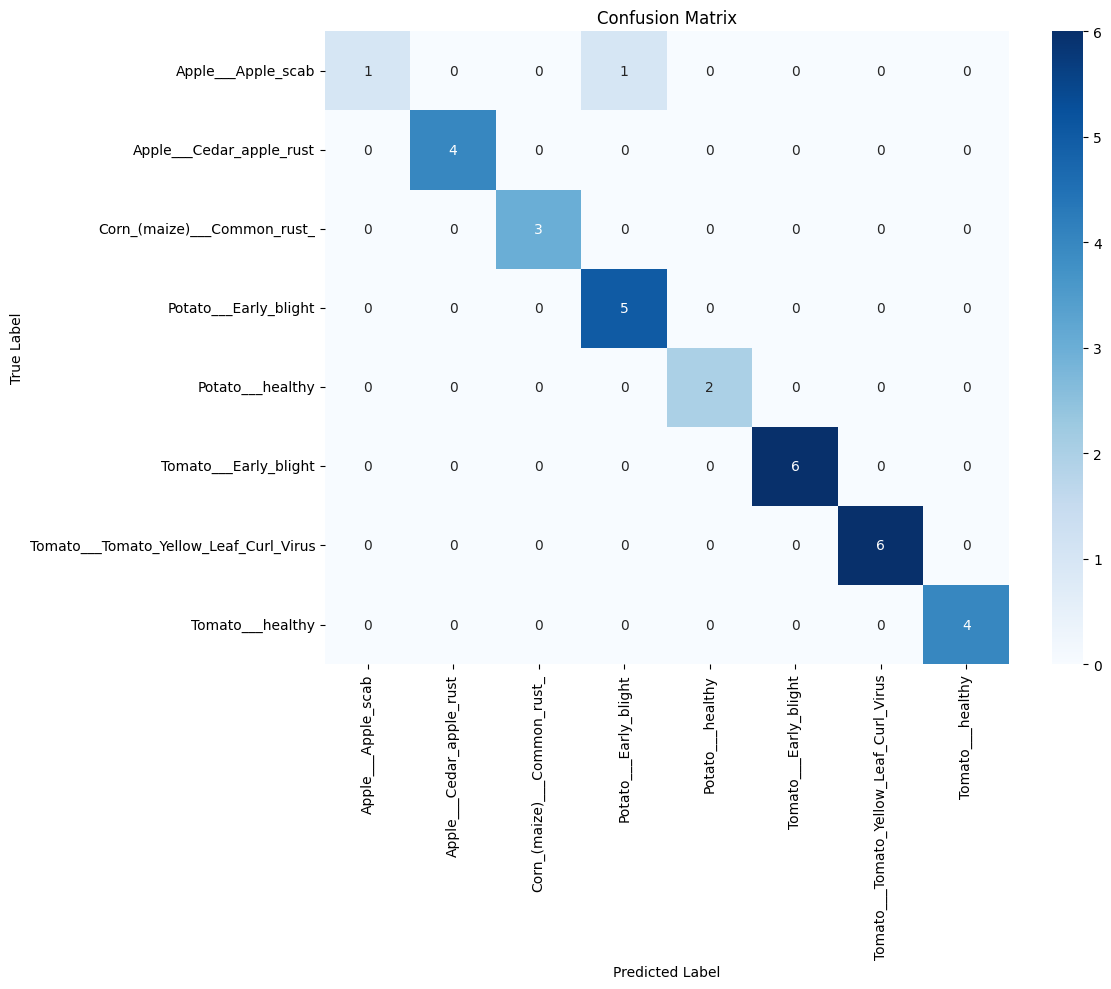

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_indices, predicted_indices, labels=present_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=present_names, yticklabels=present_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()